

# Project: Investigate a Dataset (NO SHOW APPOINTMENT)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
#Importing the libaries that will be needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Reading my csv file and viewing it from the top.
import pandas as pd
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking the bottom part of my data.
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
#checking for detailed information about my dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above data i can see i have 110527 rows and 14 columns,There are no empty rows so my data set is okay.

In [5]:
#To check the overview of the unique value present in my data set
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>.From the above data set we can see that a couple of columns have the same value like hypertension,scholarship,diabetes,alcholism are represented in 0 and 1.

> Gender(M,F) and No- show(yes or no).

> Handicap is showing 5 so i will need to investigate that.

In [6]:
#i used value_count() to check the number of times the Handcap occured
df["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [7]:
#using a function to know the % of the population with zero disability and highest no of disability.
def percentage(x):
    total_pop= 110527
    percent =(x/total_pop)*100
    return float(percent)

In [8]:
#checking for zero disability
percentage(108286)

97.97244112298353

>.So what this means is 97.97% of the population have no disability(0-means no disbility,1-mild disability,2-average disability,3-severe disbility,4-serious disabilty).

In [9]:
#checking for highest no of disabilty
percentage(3)

0.002714268911668642

>.This means that 0.0027% of the population which is almost insignificant have serious disability.

In [10]:
#checking for the statistical data like mean,median,std and percentiles.
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>.From my dataset i noticed that PatientId and AppointmentID are in wrong data types so i will need to change them.

>.The age has a value of -1 which is impossible,that will need cleaning too.


# CLEANING FORMAT
>.I will be dropping the AppointmentID since i will not be needing that.

>.changing AppointmentDay and ScheduledDay from object to datetime data type.

>.I Will be changing Hipertension,Diabetes,Alcoholism,Handcap,SMS_received and scholership from string to object type of data.

>.Will be removing the age that is lesser than 1

In [11]:
#will be using the drop function to remove AppointmentID since its not necessary
df=df.drop(["AppointmentID","PatientId"],axis=1)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [12]:
# convert Hipertension,Diabetes,Alcoholism,Handcap,SMS_received and scholarship from string to object type.
df.iloc[:, 5:10] = df.iloc[:,5:10].astype(object)
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [13]:
#changed AppointmentDay and ScheduledDay to datetime type
df['AppointmentDay'] = df['AppointmentDay'].apply(pd.to_datetime, errors='coerce')


In [16]:
# to count the various value for age to check if truly an age is -1
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [17]:
#I queried for the particular row with age of -1
dAge = df.query('Age == -1')

In [18]:
#printed out the result to be sure i madethe right query
dAge

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
#I used the drop function to drop the particular row with age -1 using the row number
df=df.drop([99832])

In [21]:
#to count the various value for age to confirm the wrong age has been dropped
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [22]:
#i wanted to check the percentage of the population less than a year old
percentage(3539)

3.201932559465108

>.3% of the population are less than a year old

 # I am done with cleaning and my dataset is ready to be vizualized.


## Exploratory Data Analysis

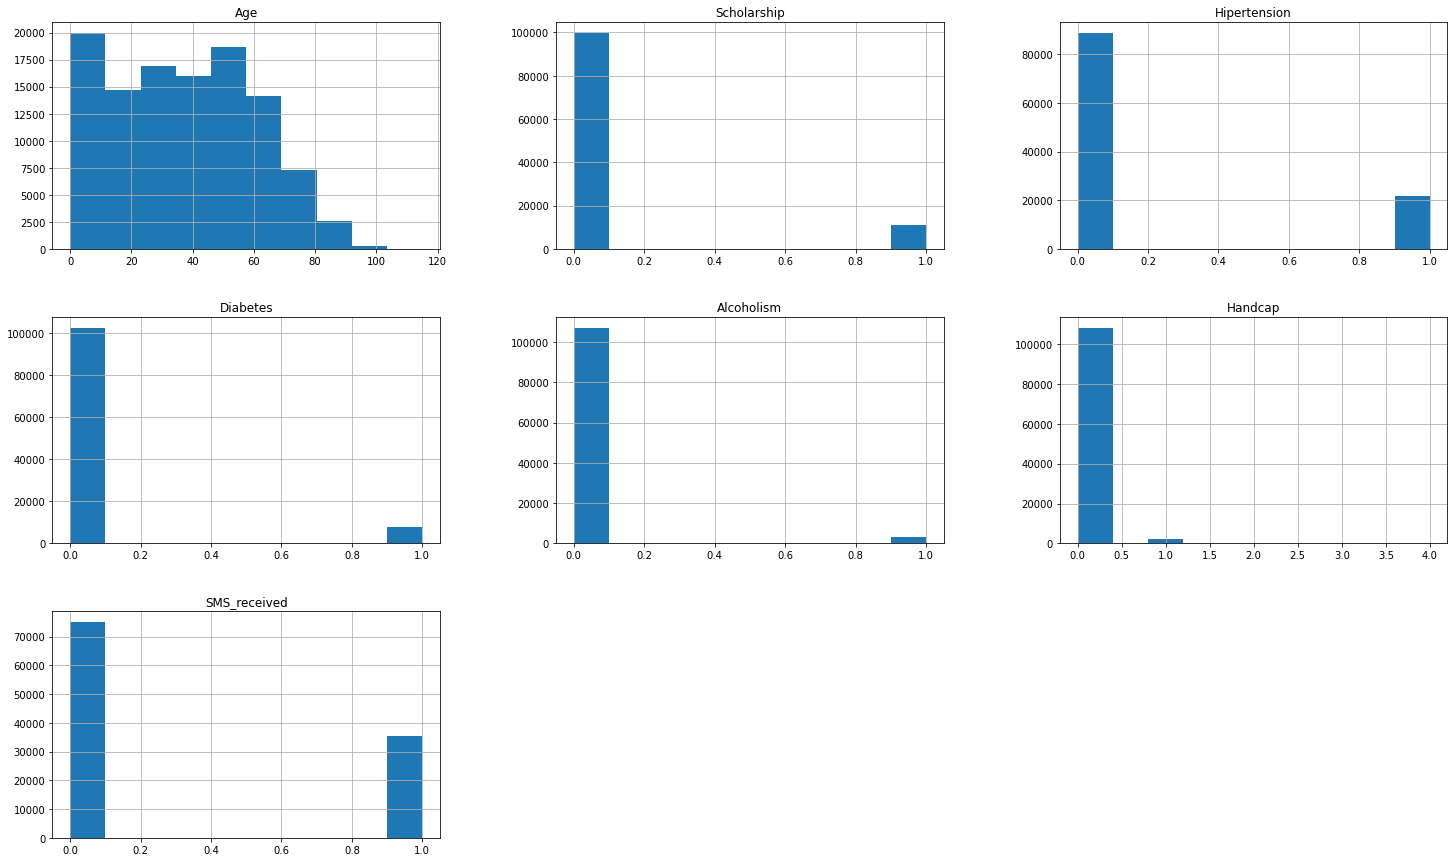

In [19]:
df.hist(figsize= (25,15));


>. From above visualisation, I noticed the the age distribution of this dataset is from 0 to slightly above 100

## Here, I will be plotting histograms for individual parameters

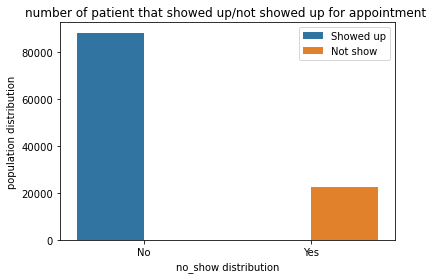

In [24]:
hx=sns.countplot(x ='No-show',hue='No-show', data = df)
plt.xlabel('no_show distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that showed up/not showed up for appointment ")
label= ['Showed up', 'Not show']
# here i am using showed up represent No and not show to represent Yes
plt.legend(label)
# Show the plot
plt.show()

>. According to the dataset, ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up."

>.  NO = showed_up and YES = not_show

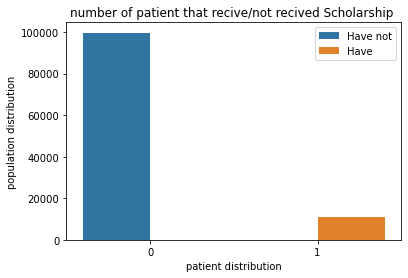

In [21]:
# creating a count plot for scholarship distribution
hx=sns.countplot(x ='Scholarship',hue='Scholarship', data = df)
plt.xlabel('patient distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that recive/not recived Scholarship ")
label= ['Have not','Have']
# here i am using have not represent 0 and have to represent 1
plt.legend(label)
# Show the plot
plt.show()

>. The above graph shows that most of the population have not received scholarship

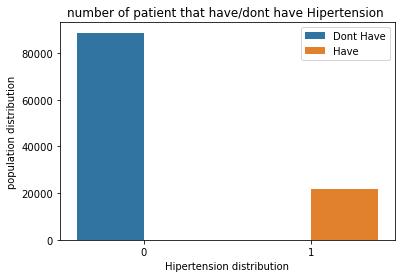

In [22]:
# creating a count plot for Hypertension distribution.
hx=sns.countplot(x ='Hipertension',hue='Hipertension', data = df)
plt.xlabel('Hipertension distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("number of patient that have/dont have Hipertension ")
label= ['Dont Have','Have']
# here i am using have not represent 0 and have to represent 1
plt.legend(label)
# Show the plot
plt.show()

>. This graph shows that a large proportion of the population dont have hypertsension

# Research Question 1  (Does Scholarship affect Show Up?)

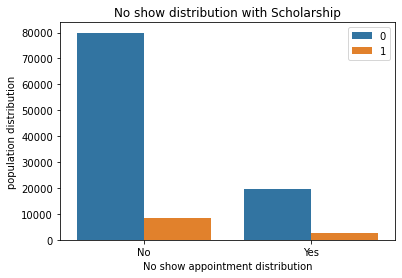

In [23]:
# creating a count plot for Scholarship distribution.
hx=sns.countplot(x ='No-show',hue='Scholarship', data = df)
plt.xlabel('No show appointment distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("No show distribution with Scholarship")
plt.legend()
# Show the plot
plt.show()

In [24]:
df['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [25]:
percentage(99665)

90.17253702715173

In [26]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [27]:
percentage(88207)

79.8058392971853

>. The above illustration shows that out of the 79.8% of the population who showed up for their appointment, 90% of them were under scholarship. *************************************** In conclusion, it shows that scholarship has a grea effect on number of show up

# Research Question 2  (What day of the week recorded most Show up.!)

In [31]:
#I created a new column with day of the week name
df['week_day']=df['AppointmentDay'].dt.day_name()
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,week_day
0,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110523,F,2016-05-03T07:27:33Z,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110524,F,2016-04-27T16:03:52Z,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110525,F,2016-04-27T15:09:23Z,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday


In [32]:
# to confirm if a new column was created
df

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,week_day
0,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110523,F,2016-05-03T07:27:33Z,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110524,F,2016-04-27T16:03:52Z,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday
110525,F,2016-04-27T15:09:23Z,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday


In [33]:
# use the value count to see the distribution by day
df['week_day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: week_day, dtype: int64

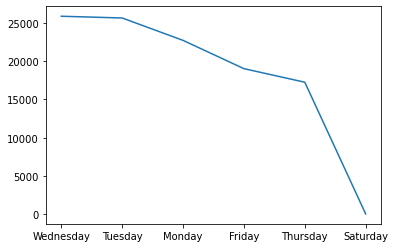

In [34]:
# ploted a line plot for distribution 
df['week_day'].value_counts().plot();


>. from the above graph, it's obvious Wednesday and Tuesday have the highest Show up, with Wednesday being slightly higher than Tuesday. Saturday recorded the lowest.

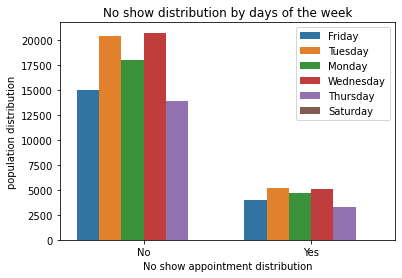

In [35]:
# creating a count plot for no show distribution by week distribution.
hx=sns.countplot(x ='No-show',hue='week_day', data = df)
plt.xlabel('No show appointment distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("No show distribution by days of the week")
plt.legend()
# Show the plot
plt.show()

>. from the distribution the population showed up more on wednesday and tuesday while saturday recorded the lowest no of Show up. for the no show individuals for thursday appointment was the least.


# Research Question 3  (Does SMS_received affect Show Up?)

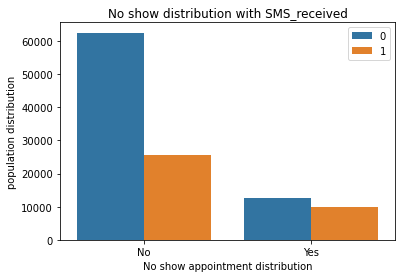

In [25]:
# creating a count plot for SMS distribution.
hx=sns.countplot(x ='No-show',hue='SMS_received', data = df)
plt.xlabel('No show appointment distribution') 
plt.ylabel('population distribution')
# displaying the title
plt.title("No show distribution with SMS_received")
plt.legend()
# Show the plot
plt.show()

In [26]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [27]:
percentage(75044)

67.89653206908719

In [28]:
df['No-show'].value_counts()

No     88207
Yes    22319
Name: No-show, dtype: int64

In [29]:
percentage(88207)

79.8058392971853

>. The above illustration shows that out of the 79.8% of the population who showed up for their appointment, 67.9% of them got SMS confirmation/reminde for their appointment. *** In conclusion, it shows that SMS_received has a great effect on number of show up

## Conclusions

>. From my analysis, I discovered that larger percentage showed up for their appointment, and out of 79.8% of the population who showed up for their appointment, 67.9% of them got SMS confirmation/reminder for their appointment, so we can say sms confirmation had a great effect in the number show up.

>.In addition, majority of the appointment where on a week day with wednesday being the highest for both show up and no show followed by Tuesday.However, no appointment was fixed for sunday and saturday recorded the lowest no of show up, also a large number did not receive the scholarship.

>.From the relationship. we can see that the highest number of people that showed up for their appointment eithier had scholarships or got sms reminders,so we can say those two factors helped greatly in no of show up.

>.Limitations: The data set did not really specify the distance of each neighbourhood to the hospital, which was what I needed to make better conclution on why some population showed up and others did not.



